# Recursion
Learning objectives
After this section

* You will know what recursion means
* You will be able to write a simple recursive function


As we have seen many times before, functions can call other functions. For example:


In [1]:

def hello(name : str):
    print("Hello", name)

def hello_many_times(name : str, times : int):
    for i in range(times):
        hello(name)


A function can also call itself, but we as programmers have to be careful when we do that. It is easy to fall into an endless loop of function calls, just like we fell into an infinite loop of repetitions with while loops if we left out the appropriate break conditions. So, trying to call a hello function with the following definition


In [2]:

def hello(name : str):
    print("Hello", name)
    hello(name) # function calls itself


would cause a new kind of error:



Sample output
```console

RecursionError: maximum recursion depth exceeded
```



## What does recursion mean?
The recursion mentioned in the error above refers to defining something in terms of itself. In a programming context it usually refers to a function which calls itself. For this to work without causing any infinite loops, the arguments passed to the function must change each time, so that the nested function calls will stop at some point. The basic principle here is the same as in while loops: there must always be a stop condition of some kind, and that condition must be triggered at some point in the execution.

Let's have a look at a simple function which adds zeroes to a list as long as there are less than 10 items in the list. This time we are not using a loop, however. If the condition is not yet met, the function calls itself:


In [3]:

def fill_list(numbers: list):
    """ If the length of the list is less than 10, add items to the list """
    if len(numbers) < 10:
        numbers.append(0)
        # call the function again
        fill_list(numbers)


if __name__ == "__main__":
    test_list = [1,2,3,4]
    fill_list(test_list)
    print(test_list)


[1, 2, 3, 4, 0, 0, 0, 0, 0, 0]



This functionality could just as well be achieved with a regular while loop:


In [ ]:

def fill_list(numbers: list):
    """ If the length of the list is less than 10, add items to the list """
    while len(numbers) < 10:
        numbers.append(0)

if __name__ == "__main__":
    test_list = [1,2,3,4]
    fill_list(test_list)
    print(test_list)


The more traditional iterative approach produces a shorter program which is arguably also easier to understand. With the recursive version it is not as clear that throughout the process we are working on the very same list. That is, however, the case, and that is why the recursive function works just as well.

## Iterative or recursive?
Computer science theory often differentiates between iterative and recursive algorithms, so it is best to become familiar with these terms right from the start. Iterative solutions are ones that are based on sequential processing of items, often using loops. So far we have dealt with iterative methods quite exclusively. Recursive, on the other hand, refers to a method where the function calls itself with changing parameter values.

In principle it should be possible to solve any problem with either iterative or recursive methods. In practice, however, one or the other is usually clearly better suited to each problem. The ability to determine which is better comes largely with practice.

# Programming exercise:Add numbers to a list

Please write a recursive function named add_numbers_to_list(numbers: list). The function takes a list of numbers as its argument, and adds new numbers to the list until the length of the list is divisible by five. Each number added to the list should be one greater than the last number in the list.

The function must call itself recursively. Please see the example below.

```python
numbers = [1,3,4,5,10,11]
add_numbers_to_list(numbers)
print(numbers)
```
Sample output
```console
[1, 3, 4, 5, 10, 11, 12, 13, 14, 15]
```

In [4]:
def add_numbers_to_list(numbers: list):
    while len(numbers) % 5 != 0:
        last_no = numbers[-1] + 1
        numbers.append(last_no)


numbers = [1,3,4,5,10,11]
add_numbers_to_list(numbers)
print(numbers)

[1, 3, 4, 5, 10, 11, 12, 13, 14, 15]


# Recursion and return values
Recursive functions can also have return values. In the last few sections we've worked with factorials, so let's write a recursive factorial function:


In [5]:


def factorial(n: int):
    """ The function calculates the factorial n! for n >= 0 """
    if n < 2:
        # The factorial for 0 and 1 is 1
        return 1

    # Call the function again with an argument that is one smaller
    return n * factorial(n - 1)

if __name__ == "__main__":
    # Tesing our function
    for i in range(1, 7):
        print(f"The factorial of {i} is {factorial(i)}")


The factorial of 1 is 1
The factorial of 2 is 2
The factorial of 3 is 6
The factorial of 4 is 24
The factorial of 5 is 120
The factorial of 6 is 720



If the parameter of the recursive factorial function is 0 or 1, the function returns 1, because this is how the factorial operation is defined. In any other case the function returns the value n * factorial(n - 1), which is the value of its parameter n multiplied by the return value of the function call factorial(n - 1).

The crucial part here is that the function definition contains a stop condition. If this is met, the recursion ends. In this case that condition is n < 2. We know it will be reached eventually, beacuse the value passed as the argument to the function is decreased by one on each level of the recursion.

The visualisation tool can be a great help in making sense of recursive programs.

It might make the above example a little clearer if we used helper variables:


In [6]:

def factorial(n: int):
    if n < 2:
        return 1

    factorial_one_level_down = factorial(n - 1)
    factorial_now = n * factorial_one_level_down
    return factorial_now
    
factorial(5)


120

Take a look at how the [visualisation tool](https://pythontutor.com/visualize.html#mode=display) demonstrates the progress of the recursion.

The visualisation tool has a small quirk in the way it handles the call stack, as it seems to "grow" downwards. Usually call stacks are depicted as just that: stacks, where the new calls are placed on top. In the visualisation tool, the currently active function call is the shaded block at the bottom, which has its own copies of the variables visible.

When the recursive factorial function is called, the call stack is built until the limit posed by n < 2 is reached. Then the final function call in the stack returns with a value - it is 1, as n is now less than 2. This return value is passed to the previous function call in the stack, where it is used to calculate that function call's return value, and so forth back out of the stack.

The return value of each function call is stored in the helper variable factorial_now. Please go through the visualisation carefully until you understand what happens at each step, and pay special attention to the value returned at each step.


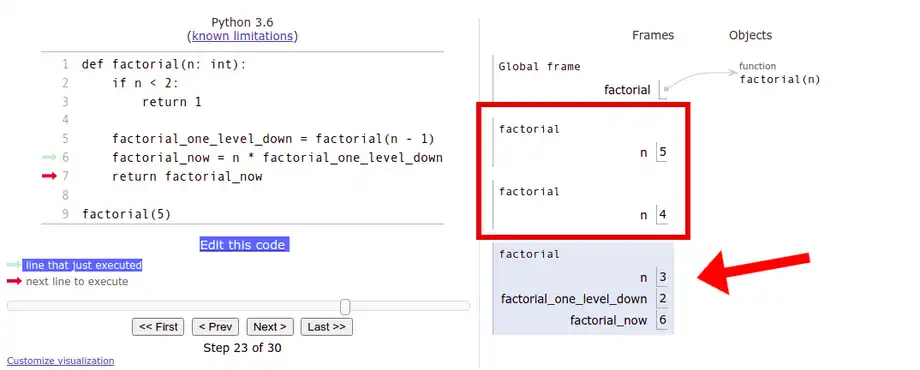


Let's have a look at another common recursive example: the Fibonacci number. In a Fibonacci sequence each number is the sum of the two preceding numbers. The first two numbers are here defined as 1 and 1, and the sequence then begins like this: 1, 1, 2, 3, 5, 8, 13, 21, 34.


In [ ]:

def fibonacci(n: int):
    """ The function returns the nth number in the Fibonacci sequence (1, 1, 2, 3, 5, 8 etc.); n > 0"""

    if n <= 2:
        # the first two are ones
        return 1

    # All other numbers equal the sum of the two preceding numbers in the sequence
    return fibonacci(n - 1) + fibonacci(n - 2)

# Test that everything works
if __name__ == "__main__":
    for i in range(1, 11):
        print(f"The {i}. number in the Fibonacci sequence is {fibonacci(i)}")


Sample output
The 1. number in the Fibonacci sequence is 1
The 2. number in the Fibonacci sequence is 1
The 3. number in the Fibonacci sequence is 2
The 4. number in the Fibonacci sequence is 3
The 5. number in the Fibonacci sequence is 5
The 6. number in the Fibonacci sequence is 8
The 7. number in the Fibonacci sequence is 13
The 8. number in the Fibonacci sequence is 21
The 9. number in the Fibonacci sequence is 34
The 10. number in the Fibonacci sequence is 55



This time the stop condition is that the parameter is less than or equal to 2, because the entire sequence is defined from the first two numbers onwards, and we defined the first two numbers to be equal to 1.

So, how does this function work in practice?

If the function is called with 1 or 2 as its argument, it returns 1, as dictated by the condition n <= 2.

If the argument is 3 or greater, the function returns the value of fibonacci(n - 1) + fibonacci(n - 2). If the argument is 3 exactly, this value is equal to fibonacci(2) + fibonacci(1), and we already know the result of both of those from the previous step. 1 + 1 equals 2, which is indeed the third number in the Fibonacci sequence.

If the argument is 4, the return value is fibonacci(3) + fibonacci(2), which we now know to be 2 + 1, which equals 3.

If the argument is 5, the return value is fibonacci(4) + fibonacci(3), which we now know to be 3 + 2, which equals 5.

And so forth, and so forth.

We can verify at every step that the function produces the correct results, which is often enough in basic programming tasks. The formal verifiability of algorithms is a topic for more advanced courses, such as Data Structures and Algorithms.

# Programming exercise:Recursive sum

Please write a recursive function named recursive_sum(number: int) which calculates the sum 1 + 2 + ... + number. The exercise template contains the following outline:

```python
def recursive_sum(number: int):
    # if the number is 1, there is nothing else to add
    if number <= 1:
        return number

    # fill in the rest of the function
```
Some examples:
```python

result = recursive_sum(3)
print(result)

print(recursive_sum(5))
print(recursive_sum(10))
```
Sample output
```console
6
15
55
```

In [4]:
def recursive_sum(number: int):
    # if the number is 1, there is nothing else to add
    
    if number <= 1:
        return number
    else:
        return number + recursive_sum(number - 1)


    # fill in the rest of the function
    


result = recursive_sum(3)
print(result)

print(recursive_sum(5))
print(recursive_sum(10))

6
15
55


# Programming exercise:Balance all the brackets

The exercise template contains the function balanced_brackets which takes a string as its argument. It checks if the round brackets, or parentheses, within the string are balanced. That is, for each opening bracket ( there should be a closing bracket ), and all pairs of brackets should be matched in order, i.e. the bracket pairs must not be crossed.

```python
def balanced_brackets(my_string: str):
    if len(my_string) == 0:
        return True
    if not (my_string[0] == '(' and my_string[-1] == ')'):
        return False

    # remove first and last character
    return balanced_brackets(my_string[1:-1])

ok = balanced_brackets("(((())))")
print(ok)

# there is one closing bracket too many, so this produces False
ok = balanced_brackets("()())")
print(ok)

# this one starts with a closing bracket, False again
ok = balanced_brackets(")()")
print(ok)

# this produces False because the function only handles entirely nested brackets
ok = balanced_brackets("()(())")
print(ok)
```
Sample output
```console
True
False
False
False
```

Please expand the function so that it also works with square brackets []. The function should also ignore all characters which are not brackets () or []. The different types of brackets must be matched correctly in order.

Please have a look at the examples below::

```python
ok = balanced_brackets("([([])])")
print(ok)

ok = balanced_brackets("(python version [3.7]) please use this one!")
print(ok)

# this is no good, the closing bracket doesn't match
ok = balanced_brackets("(()]")
print(ok)

# different types of brackets are mismatched
ok = balanced_brackets("([bad egg)]")
print(ok)
```
NB: the function only needs to handle entirely nested brackets. The string (x + 1)(y + 1) should produce False as the brackets are not nested within each other.

Sample output
```console
True
True
False
False
```

In [13]:
def balanced_brackets(my_string: str):
    new_string = ""
    for char in my_string:
        if char in "([])":
            new_string += char


    if len(new_string) == 0:
        return True
    if not (new_string[0] == '(' and new_string[-1] == ')'):
        if not (new_string[0] == '[' and new_string[-1] == ']'):
            return False

    # remove first and last character
    return balanced_brackets(new_string[1:-1])

ok = balanced_brackets("([([])])")
print(ok)

ok = balanced_brackets("(python version [3.7]) please use this one!")
print(ok)

# this is no good, the closing bracket doesn't match
ok = balanced_brackets("(()]")
print(ok)

# different types of brackets are mismatched
ok = balanced_brackets("([bad egg)]")
print(ok)

ok = balanced_brackets("(x + 1)(y + 1)")
print(ok)

True
True
False
False
False


In [8]:
def balanced_brackets(my_string: str):
    new_string = ""
    for char in my_string:
        if char in "([])":
            new_string += char

    return new_string

balanced_brackets("([([there])])")

'([([])])'

# Binary search
In a binary search we have a sorted list of items and we are trying to find a certain item within. The order of the items could be, for example, numbers from smallest to greatest, or strings from alphabetically first to last. The method of sorting doesn't matter, as long as it is known and relevant to the item we are trying to find.

The idea of a binary search is to always look at the item at the very centre of the list. We then have three possible scenarios. If the item at the centre is

* the one we are looking for: we can return an indication that we found the item
* smaller than the one we are looking for: we can re-do the search in the greater half of the list
* greater than the one we are looking for: we can re-do the search in the smaller half of the list.

If the list is empty, we can determine that the item was not found, and return an indication of that.

In the following image we can see how a binary search progresses as it looks for the number 24:


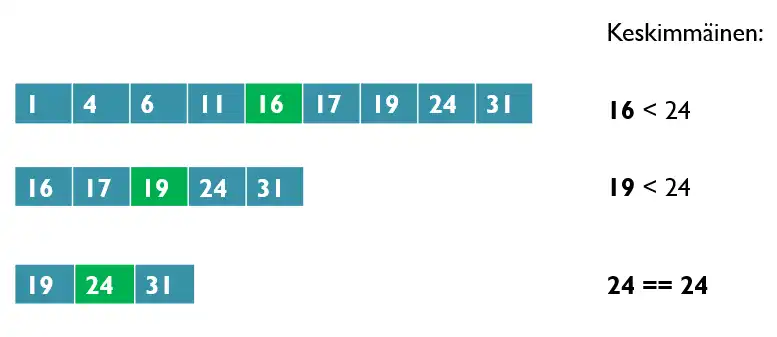



Here is a recursive algorithm for a binary search:


In [1]:

def binary_search(target: list, item: int, left : int, right : int):
    """ The function returns True if the item is contained in the target list, False otherwise """
    # If the search area is empty, item was not found
    if left > right:
        return False

    # Calculate the centre of the search area, integer result
    centre = (left+right)//2

    # If the item is found at the centre, return
    if target[centre] == item:
        return True

    # If the item is greater, search the greater half
    if target[centre] < item:
        return binary_search(target, item, centre+1, right)
    # Else the item is smaller, search the smaller half
    else:
        return binary_search(target, item, left, centre-1)


if __name__ == "__main__":
    # Test your function
    target = [1, 2, 4, 5, 7, 8, 11, 13, 14, 18]
    print(binary_search(target, 2, 0, len(target)-1))
    print(binary_search(target, 13, 0, len(target)-1))
    print(binary_search(target, 6, 0, len(target)-1))
    print(binary_search(target, 15, 0, len(target)-1))


True
True
False
False



The binary_search function takes four arguments: the target list, the item being searched for, and the left and right edges of the search area. When the function is first called, the search area covers the entire target list. The left edge is at index 0 and the right edge is at index len(target)-1. The function calculates the central index and checks that position on the list. Either the item was found, or the search continues to the smaller or greater half of the target list.

Let's compare this to a simple linear search. In a linear search, the search area is traversed from the beginning onwards, until either the item is found, or we run out of search area. The number of steps needed to cover the entire search area grows linearly at the same pace as the size of the search area. Each search step covers only one search candidate from the beginning of the search area. Let's assume the item searched for is not found. If the search area is a million items long, we would have to take a million search steps to make sure the item is not in the search area.

In a binary search, on the other hand, the number of steps needed grows logarithmically. Let's assume again that the item searched for is not found. The search area is cut in half with each step, as we know that the item is either smaller or greater than the current search candidate at the centre. 2 to the power of 20 (2^20) is already well over 1 million, so it will take at most 20 steps to cover the entire search area with a binary search. So, when we are dealing with sorted search areas, as we often are when dealing with computers and materials that are meant to be automatically processed, a binary search is much more efficient than a linear search.

You have reached the end of this section! Continue to the next section: